<a href="https://colab.research.google.com/github/km0m/Deep-Learning/blob/master/02_RNN_FrozenDessert_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Tensorflow 2 and Keras Deep Learning Bootcamp/RNN'
if os.getcwd() != file_path:
  os.chdir(file_path)

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Tensorflow 2 and Keras Deep Learning Bootcamp/RNN'

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [ ]:
ls '../Data Files'

ls: cannot access '../Data Fileshead': No such file or directory


In [ ]:
df = pd.read_csv('../Data Files/Frozen_Dessert_Production.csv', index_col='DATE')

In [ ]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [ ]:
df.columns = ['Production']

In [ ]:
df.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


**TASK: Plot out the time series**

<Axes: xlabel='DATE'>

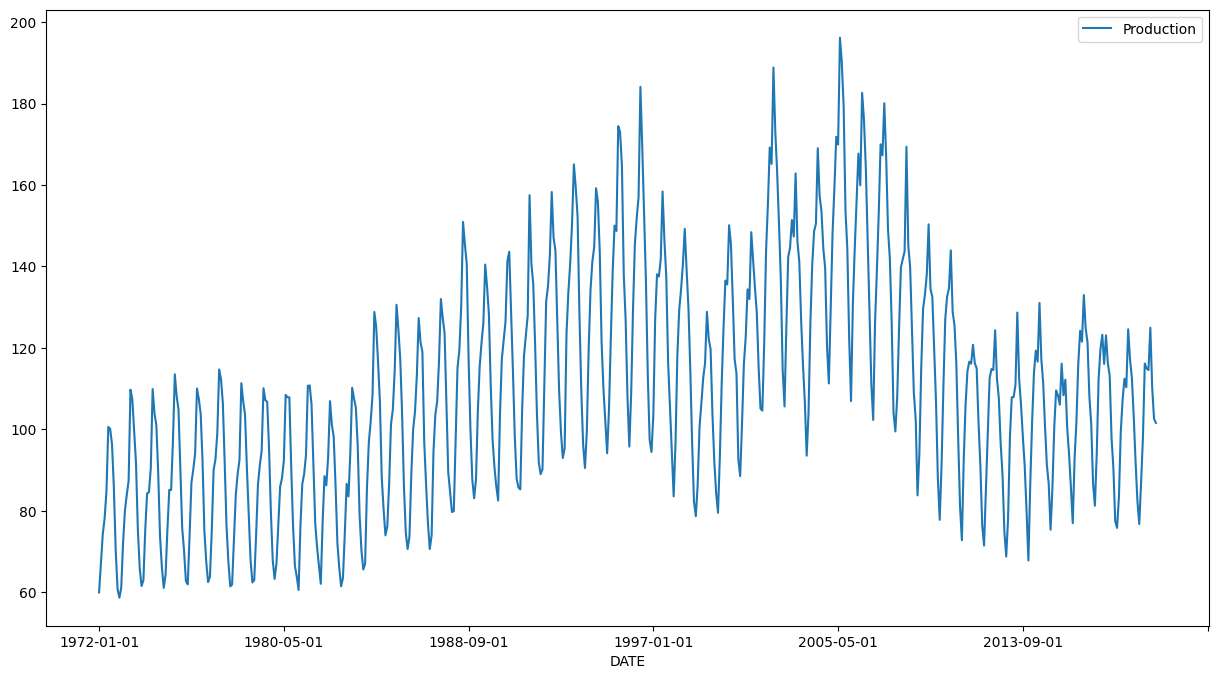

In [ ]:
df.plot(figsize=(15,8))

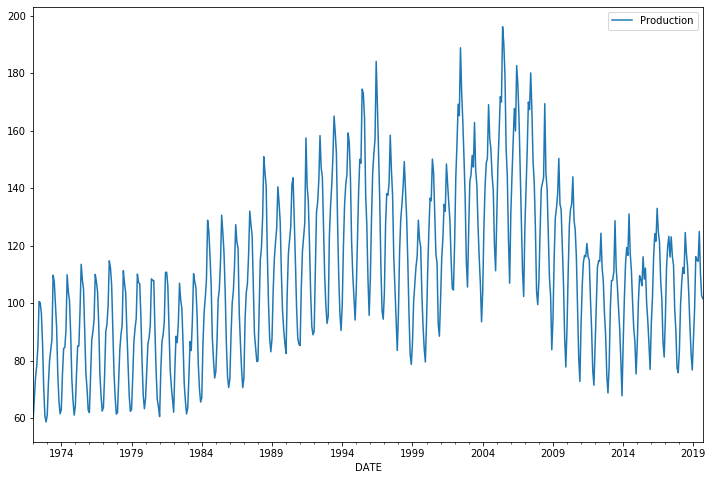

## Train Test Split

**TASK: Figure out the length of the data set**

In [ ]:
len(df)

573

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [ ]:
test_length=24

In [ ]:
train_data = df[:-test_length]

In [ ]:
train_data.head()
len(train_data)

549

In [ ]:
test_data = df[-test_length:]

In [ ]:
test_data.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_data)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 18
generator_train = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
model = Sequential()

n_features=1

# Add LSTM layer
model.add(LSTM(120, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120)               58560     
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 58681 (229.22 KB)
Trainable params: 58681 (229.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [ ]:
length_test=17
generator_test = TimeseriesGenerator(scaled_test, scaled_test, length=length_test, batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min')

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [ ]:
model.fit_generator(generator_train, epochs=20, callbacks=[early_stop], validation_data=generator_test)
model.save('model_exercise.h5')

Epoch 1/20


<ipython-input-32-1903376c13ec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator_train, epochs=20, callbacks=[early_stop], validation_data=generator_test)


531/531 [==============================] - 10s 14ms/step - loss: 0.0386 - val_loss: 0.0043
Epoch 2/20
531/531 [==============================] - 10s 19ms/step - loss: 0.0240 - val_loss: 0.0062
Epoch 3/20
531/531 [==============================] - 7s 12ms/step - loss: 0.0121 - val_loss: 0.0024
Epoch 4/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0065 - val_loss: 0.0084
Epoch 5/20
531/531 [==============================] - 10s 18ms/step - loss: 0.0063 - val_loss: 0.0023
Epoch 6/20
531/531 [==============================] - 7s 13ms/step - loss: 0.0062 - val_loss: 0.0030
Epoch 7/20
531/531 [==============================] - 10s 18ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 8/20
531/531 [==============================] - 7s 14ms/step - loss: 0.0049 - val_loss: 0.0028


Epoch 1/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0261 - val_loss: 0.0043
Epoch 2/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 3/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 4/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 6/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 7/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0030 - val_loss: 0.0025


In [ ]:
model.save('model_exercise.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#model = load_model('model_exercise.h5')

**TASK: Plot the history of the loss that occured during training.**

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

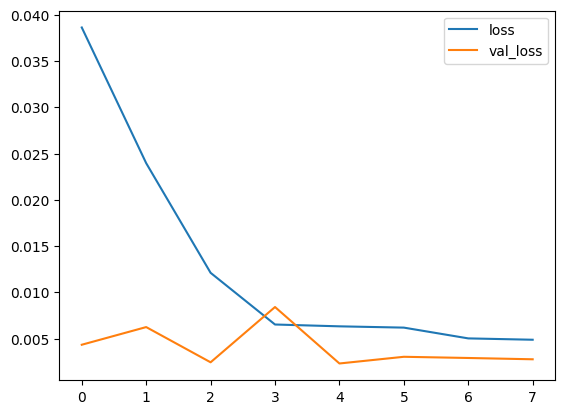

In [ ]:
losses.plot()

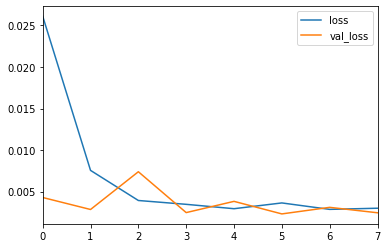

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [ ]:
first_eval_batch = scaled_train[-length:].reshape(1, length, n_features)

In [ ]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 24ms/step


array([[0.23084073]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.23134679])

In [ ]:
np.append(first_eval_batch[:,1:,:],np.reshape(np.array([model.predict(first_eval_batch)]), (1,1,1)), axis=1)

1/1 [==============================] - 0s 147ms/step


array([[[0.45728977],
        [0.54050318],
        [0.48134479],
        [0.45575247],
        [0.35906261],
        [0.31068714],
        [0.20365141],
        [0.16432593],
        [0.2587782 ],
        [0.39071032],
        [0.44387077],
        [0.4695409 ],
        [0.41743926],
        [0.46851409],
        [0.41889656],
        [0.39641011],
        [0.28544533],
        [0.23084073]]])

In [ ]:
np.reshape(np.array([25]), (1,1,1))

array([[[25]]])

In [ ]:
def forecast(eval_batch, length, n_features):
  return model.predict(eval_batch)

In [ ]:
current_batch = first_eval_batch
predictions = []

for i in range(len(test_data)):
  predicted_val = forecast(current_batch, length, n_features)
  current_batch = np.append(current_batch[:,1:,:],[[predicted_val]], axis=1)
  predictions.append(predicted_val)

1/1 [==============================] - 0s 24ms/step


ValueError: ignored

array([0.23134679])

C:\Users\Marcial\Anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Production,Predictions
DATE,,
2017-10-01,90.4732,84.348756
2017-11-01,77.4378,75.246538
2017-12-01,75.8118,75.356393
2018-01-01,83.4343,84.964974
2018-02-01,99.4899,95.405271
2018-03-01,107.3152,103.265306
2018-04-01,112.4309,109.163361
2018-05-01,110.3544,113.237268
2018-06-01,124.5841,114.119150


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

In [ ]:
# CODE HERE

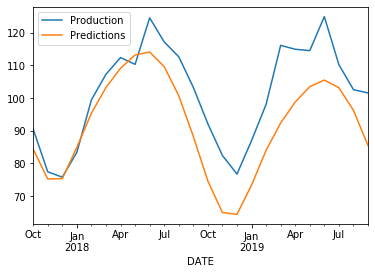

**TASK: Calculate your RMSE.**

In [ ]:
#CODE HERE